# Data Analysis Portfolio Project: Biodiversity in National Parks

This is a Codecademy Data Analysis Career Path Portfolio Project in which the author will interpret data about species from different parks for the National Parks Service.

## Scope
There are four stages to this project. First, we will define the objectives for the project. Second, we'll look at the data. Third, we will lay out the analysis to be done, including methodology. Next, we will evaluate the results of the analysis, and finally, we will present our conclusions.

## Project Goals
The premise for the project is that the National Parks Service wants an analysis of the biodiversity of species in its properties. The author will take the role of a biodiversity analyst working for the NPS. Questions that need to be answered are:
1. Which species have been observed in which Parks?
2. What is the distribution of conservation statuses for those species?
3. Are certain types of species more likely to be endangered?
4. Are the differences between species and their conservation status significant?
5. Which species are most prevalent and what is their distribution amongst parks?

## Data
There are two data files provided as part of this project. The first file, species_info.csv, contains the scientific and common names of various species as well as their conservation status. The second, observations.csv, has the scientific names of the species, the names of national parks in which they are found, and the number of observations reported for them in the last seven days.

## Analysis
In this section, we will use both summary statistics and data visualization techniques to understand the data. In order to judge whether observed values are statistically significant we will utilize statistical inference. We will be computing:

* Distributions of species in parks
* Counts of categories and species
* Relationships between species
* Conservation statuses of species
* Observations of species in parks

## Evaluation
We will revisit our goals and evaluate the results of our analysis to see if they answer our questions. We will also lay out what has been learned in the process, such as whether we should have used different methodologies or whether we discovered that some questions could not be answered.

## Presentation
We will present our findings in order to make them easily accessible to our audience.

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns
observations = pd.read_csv('observations.csv')
print(observations.head(10))
species = pd.read_csv('species_info.csv')
print(species)

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

Let's get some information about the data.

In [325]:
num_species_obs = observations.scientific_name.nunique()
num_species = species.scientific_name.nunique()
num_parks = observations.park_name.nunique()
num_categories = species.category.nunique()
num_statuses = species.conservation_status.nunique()
print('The number of species in the observations file is ' + str(num_species_obs) + '.')
print('The number of species in the species info file is ' + str(num_species) + '.')
print('The number of parks in which species were observed is ' + str(num_parks) + '.')
print('The number of categories of species noted is ' + str(num_categories) + '.')
print('The number of different conservation statuses noted is ' + str(num_statuses) + '.')

The number of species in the observations file is 5541.
The number of species in the species info file is 5541.
The number of parks in which species were observed is 4.
The number of categories of species noted is 7.
The number of different conservation statuses noted is 4.


I want more more detail regarding the data.

In [332]:
species_cat_unique = species.category.unique()
print(species_cat_unique)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [333]:
status_unique = species.conservation_status.unique()
print(status_unique)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [334]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [335]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [336]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


It looks like there are maany values missing in the conservation_status field.
Are all of the scientific names unique?

In [338]:
name_dupes = species[species.duplicated(subset=['scientific_name'])]
print(name_dupes)

            category                   scientific_name  \
3017          Mammal                    Cervus elaphus   
3019          Mammal            Odocoileus virginianus   
3020          Mammal                       Canis lupus   
3022          Mammal                     Puma concolor   
3025          Mammal                  Lutra canadensis   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
3017                                 Rocky Mountain Elk                 NaN  
3019               White-Tailed Deer, White-Tailed Deer                 NaN  
3020                                    Gray Wolf, Wolf         In Re

I want to clean up the duplicated species.

In [339]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


Now we'll look to the observations file.

In [340]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [341]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern


Now to merge the two dataframes.

In [344]:
data = pd.merge(observations, species, left_on='scientific_name', right_on='scientific_name', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  716 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


I should really check to be sure none of the species is on multiple rows for the same park.

In [345]:
data.drop_duplicates(subset=['scientific_name', 'park_name'], keep='first', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  716 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [346]:
data.category.value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [347]:
data.park_name.value_counts()

Bryce National Park                    5541
Yosemite National Park                 5541
Yellowstone National Park              5541
Great Smoky Mountains National Park    5541
Name: park_name, dtype: int64

In [348]:
data.conservation_status.value_counts()

Species of Concern    604
Endangered             60
Threatened             40
In Recovery            12
Name: conservation_status, dtype: int64

We have to assume that the missing entries for the conservation status column represent species in Least Concern status.

In [349]:
data.fillna('Least Concern', inplace=True) 

In [350]:
data.conservation_status.value_counts()

Least Concern         21448
Species of Concern      604
Endangered               60
Threatened               40
In Recovery              12
Name: conservation_status, dtype: int64

Now that our data is cleaned up and presentable, we're ready for the next step.

## Analysis
We're going to examine the number of observations per category first.

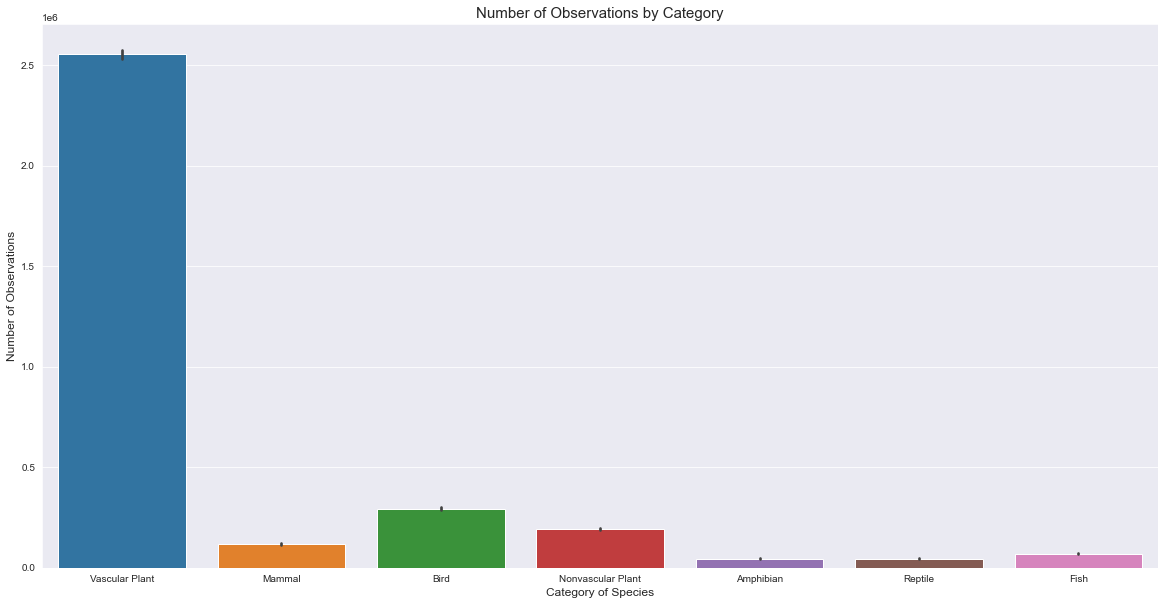

In [380]:
fig1 = plt.figure(figsize=(20, 10))
sns.barplot(x='category', y='observations', data=data, estimator=np.sum)
plt.title('Number of Observations by Category', fontsize = 15)
plt.xlabel('Category of Species', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.show()

The observations of vascular plants outpaced all other species, followed by birds, then nonvascular pleants, and mammals.

I want to plot a histogram of the observations.

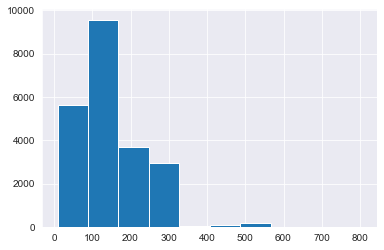

In [352]:
plt.hist(data.observations)
plt.show()

In [353]:
data.sort_values(by = ['observations'],ascending=False).head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
19522,Holcus lanatus,Yellowstone National Park,805,Vascular Plant,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Least Concern
9842,Streptopelia decaocto,Yellowstone National Park,771,Bird,Eurasian Collared Dove,Least Concern
14664,Puma concolor,Yellowstone National Park,753,Mammal,Mountain Lion,Least Concern
7119,Procyon lotor,Yellowstone National Park,745,Mammal,Raccoon,Least Concern
21203,Hypochaeris radicata,Yellowstone National Park,726,Vascular Plant,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern


Let's check the observations by park.

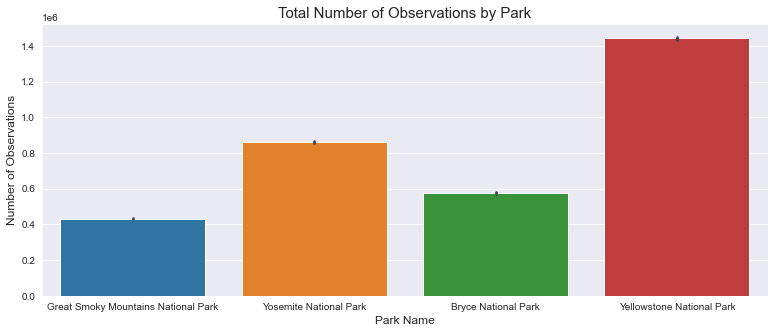

In [381]:
plt.figure(figsize = (13,5))
sns.barplot(data = data, x = 'park_name', y = 'observations', estimator=sum)
plt.xlabel('Park Name', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Total Number of Observations by Park', fontsize = 15)
plt.show()

The greatest number of observations by far were in Yellowstone. We don't know if that's because there are more species in Yellowstone or if they had more people counting or if the different parks did their counts at different times of year.

Now let's group the species observed by conservation status.

In [382]:
status = data.groupby(['category','conservation_status']).size().reset_index(name = 'number')
status.tail(10)

,category,conservation_status,number
14,Mammal,Species of Concern,88
15,Mammal,Threatened,8
16,Nonvascular Plant,Least Concern,1312
17,Nonvascular Plant,Species of Concern,20
18,Reptile,Least Concern,292
19,Reptile,Species of Concern,20
20,Vascular Plant,Endangered,4
21,Vascular Plant,Least Concern,16864
22,Vascular Plant,Species of Concern,172
23,Vascular Plant,Threatened,8


Most species fall into the "Least Concern" category. That's good! Still, we have 204 species in other statuses. What category of species falls into which status?

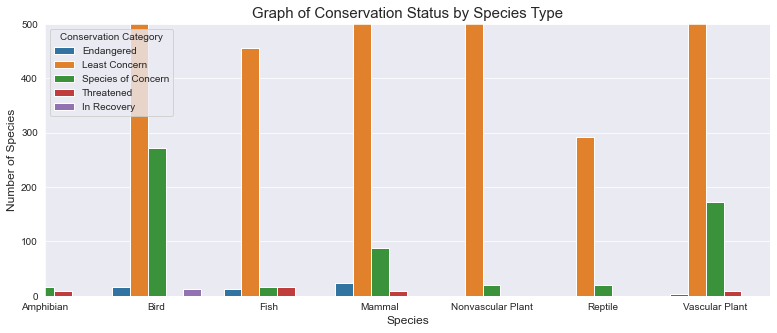

In [383]:
plt.figure(figsize = (13,5))
sns.barplot(x ="category", y = 'number', data = status, hue = "conservation_status")
plt.axis([0,6.5,0,500])
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Number of Species', fontsize = 12)
plt.title('Graph of Conservation Status by Species Type', fontsize = 15)
plt.legend(title = 'Conservation Category', loc = 2)
plt.show()

That isn't really giving me what I want, so I'm going to try looking at the distribution of conservation statuses by observations.

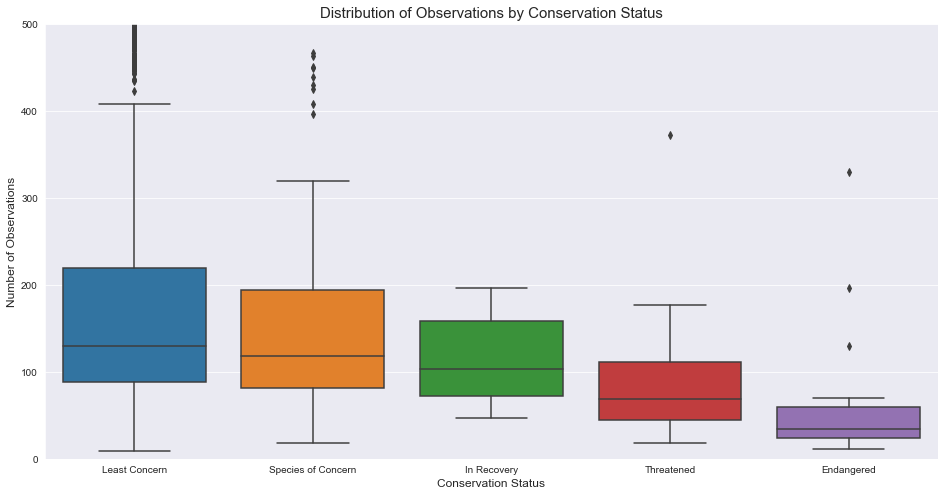

In [384]:
fig = plt.figure(figsize=(16, 8))
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=data, order=order)
plt.ylim(0, 500)
plt.title('Distribution of Observations by Conservation Status', fontsize = 15)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.show()

That's much better. Let's see how the statuses are distributed across the parks.

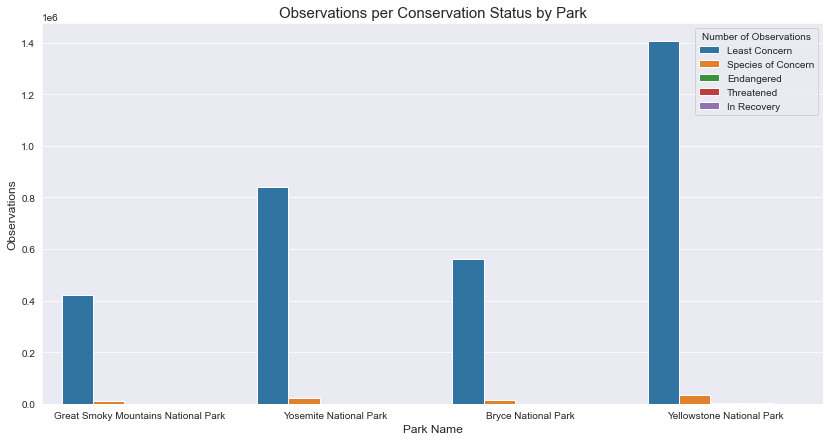

In [385]:
plt.figure(figsize = (14,7))
sns.set_style("darkgrid")
sns.barplot(data = data, x = 'park_name', y = 'observations', hue = 'conservation_status', 
            ci = None, estimator=sum)
plt.title('Observations per Conservation Status by Park', fontsize = 15)
plt.xlabel('Park Name', fontsize = 12)
plt.ylabel('Observations', fontsize = 12)
plt.legend(title='Number of Observations')
plt.show()

I don't know about you, but I can't tell what kinds of numbers we're talking about on that graph. Let's see how it looks without the Least Concern species.

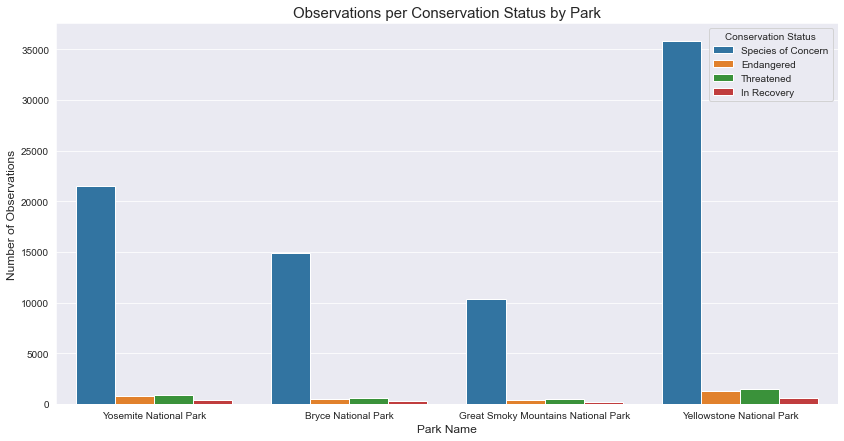

In [386]:
plt.figure(figsize = (14,7))
sns.set_style("darkgrid")
sns.barplot(data = data[data.conservation_status != 'Least Concern'], x = 'park_name', y = 'observations', hue = 'conservation_status', 
            ci = None, estimator=sum)
plt.title('Observations per Conservation Status by Park', fontsize = 15)
plt.xlabel('Park Name', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.legend(title='Conservation Status')
plt.show()

That's much easier to interpret.

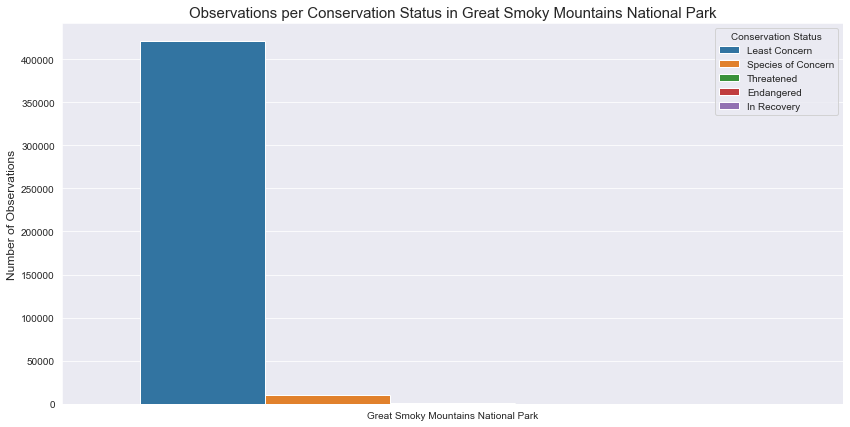

In [389]:
plt.figure(figsize = (14,7))
sns.set_style("darkgrid")
sns.barplot(data = data[data.park_name == 'Great Smoky Mountains National Park'], x = 'park_name', y = 'observations', hue = 'conservation_status', 
            ci = None, estimator=sum)
plt.title('Observations per Conservation Status in Great Smoky Mountains National Park', fontsize = 15)
plt.xlabel('')
plt.ylabel('Number of Observations', fontsize = 12)
plt.legend(title='Conservation Status')
plt.show()

I'm not wild about that, either, though. Let's try a boxplot.

Text(0.5, 1.0, 'Distribution of Observations by Conservation Status in Great Smoky Mountains National Park')

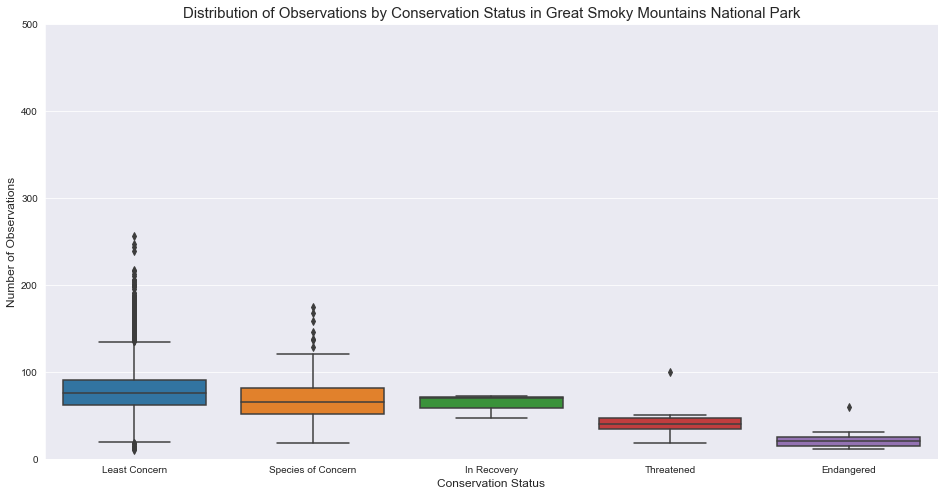

In [390]:
fig = plt.figure(figsize=(16, 8))
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=data[data.park_name=='Great Smoky Mountains National Park'], order=order)
plt.ylim(0, 500)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Distribution of Observations by Conservation Status in Great Smoky Mountains National Park', fontsize = 15)

That's more like it! Let's look at the other three parks.

Text(0.5, 1.0, 'Distribution of Observations by Conservation Status in Bryce National Park')

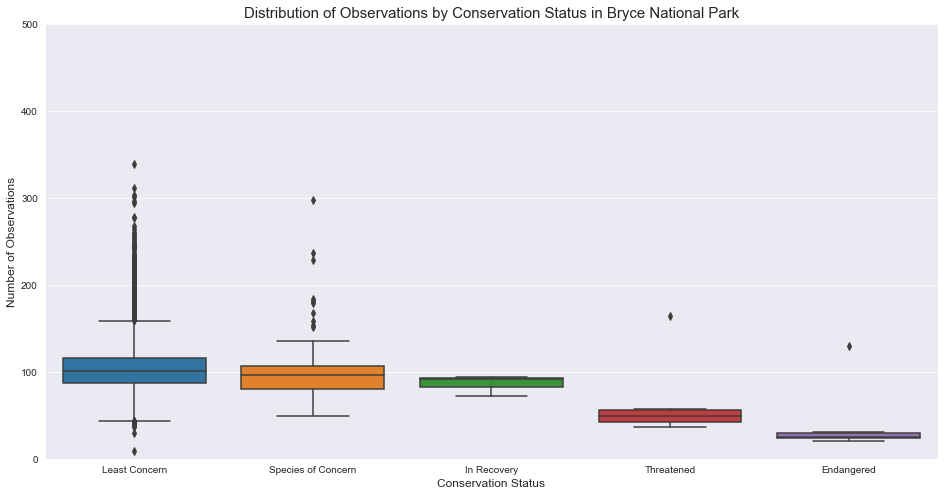

In [391]:
fig = plt.figure(figsize=(16, 8))
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=data[data.park_name=='Bryce National Park'], order=order)
plt.ylim(0, 500)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Distribution of Observations by Conservation Status in Bryce National Park', fontsize = 15)

Text(0.5, 1.0, 'Distribution of Observations by Conservation Status in Yosemite National Park')

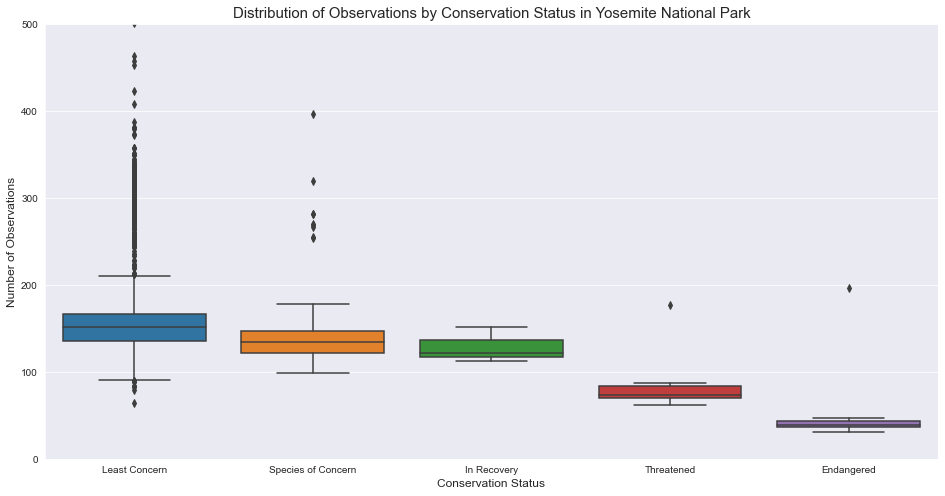

In [392]:
fig = plt.figure(figsize=(16, 8))
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=data[data.park_name=='Yosemite National Park'], order=order)
plt.ylim(0, 500)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Distribution of Observations by Conservation Status in Yosemite National Park', fontsize = 15)

Text(0.5, 1.0, 'Distribution of Observations by Conservation Status in Yellowstone National Park')

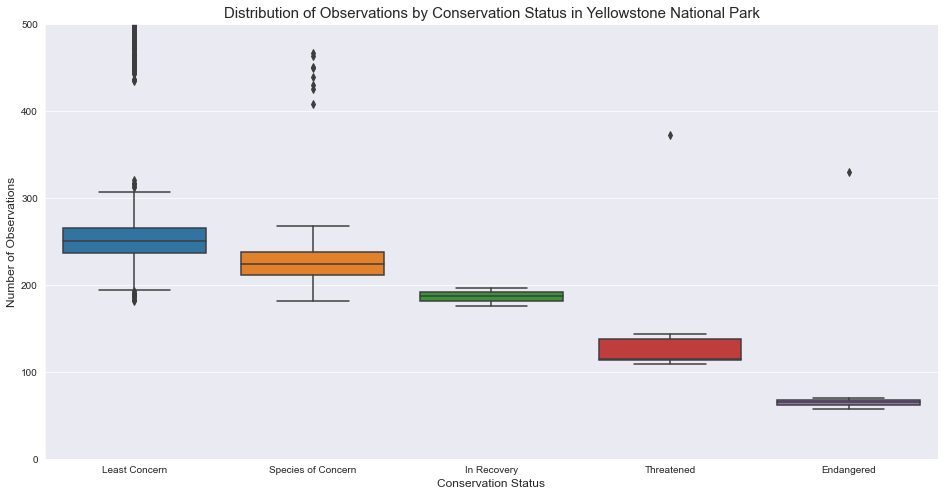

In [393]:
fig = plt.figure(figsize=(16, 8))
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=data[data.park_name=='Yellowstone National Park'], order=order)
plt.ylim(0, 500)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Distribution of Observations by Conservation Status in Yellowstone National Park', fontsize = 15)

Let's see if there's a better way to look at distribution by conservation status.

Text(0, 0.5, 'Number of Observations')

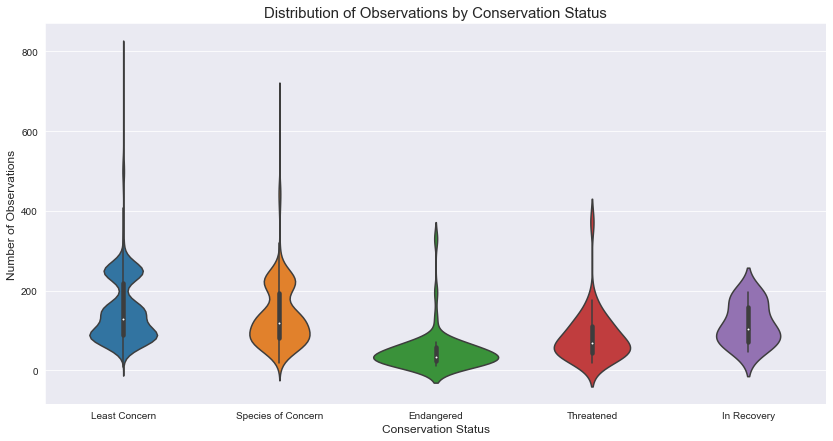

In [394]:
plt.figure(figsize = (14,7))
sns.violinplot(data = data, x = 'conservation_status', y = 'observations')
plt.title('Distribution of Observations by Conservation Status', fontsize = 15)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)

Now I want to see just the species about which there is concern.

In [395]:
concerned = data[(data.conservation_status != 'Least Concern')]
conditions = [
    (data.conservation_status == 'Species of Concern'),
    (data.conservation_status == 'Endangered'),
    (data.conservation_status == 'Threatened'),
    (data.conservation_status == 'In Recovery')
    ]
# create a list of the values we want to assign for each condition
values = ['tier_4', 'tier_3', 'tier_2', 'tier_1']
concerned.head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
22,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
31,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
63,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
84,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
107,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


Now I want to see the species about which we're concerned, broken down by status and park.

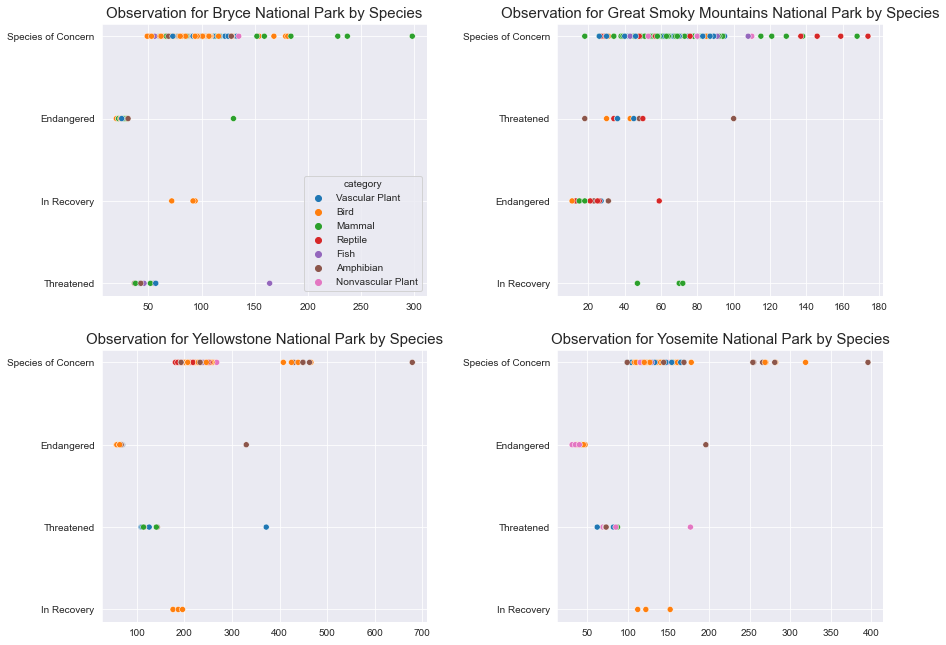

In [396]:
plt.figure(figsize = (14,11))
list = ['Bryce National Park', 'Great Smoky Mountains National Park', 
         'Yellowstone National Park', 'Yosemite National Park']
num = 1

for i in list:
    ax = plt.subplot(2,2,num)
    sns.scatterplot(data = concerned[(concerned.park_name == i)], x = 'observations', y = 'conservation_status', hue = 'category')

    if num > 1:
        plt.legend([],[], frameon=False)
    
    ax.set_ylabel('')  
    ax.set_xlabel('')  
    plt.title(f'Observation for {i} by Species', fontsize = 15)
    num += 1
    
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.2)
plt.show()

Now we can look at the categories by park.

In [397]:
park_categories = concerned.groupby(['park_name', 'category']).sum()
park_categories

observations
park_name                           category                       
Bryce National Park                 Amphibian                   498
                                    Bird                       6926
                                    Fish                        731
                                    Mammal                     3037
                                    Nonvascular Plant           486
                                    Reptile                     387
                                    Vascular Plant             4198
Great Smoky Mountains National Park Amphibian                   333
                                    Bird                       4741
                                    Fish                        547
                                    Mammal                     1968
                                    Nonvascular Plant           373
                                    Reptile                     365
                                    Vascular Plant             2950
Yellowstone National Park           Amphibian                  1167
                                    Bird                      16788
                                    Fish                       1875
                                    Mammal                     7220
                                    Nonvascular Plant          1169
                                    Reptile                    1100
                                    Vascular Plant             9716
Yosemite National Park              Amphibian                   754
                                    Bird                      10153
                                    Fish                       1056
                                    Mammal                     4224
                                    Nonvascular Plant           677
                                    Reptile                     684
                                    Vascular Plant             5985

Let's try again to look at the observations by park.

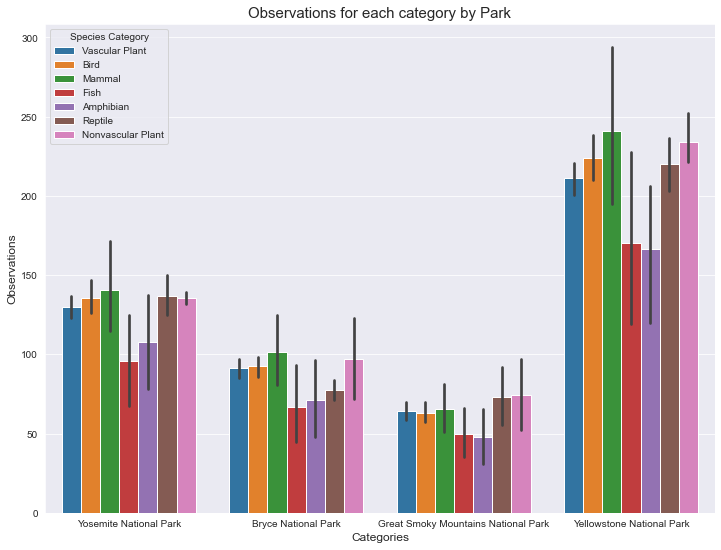

In [398]:
plt.figure(figsize = (12,9))
sns.barplot(data = concerned, x = 'park_name', y = 'observations', hue = 'category')
plt.title('Observations for each category by Park', fontsize = 15)
plt.xlabel('Categories', fontsize = 12)
plt.ylabel('Observations', fontsize = 12)
plt.legend(title = 'Species Category')
plt.show()

Now, is there a significant difference in the various species and their statuses? First we'll do the full set of data.

In [401]:
freq = pd.crosstab(data.category, data.conservation_status)
chi2, pval, dof, expected = chi2_contingency(freq)
print(chi2, pval )

2364.6053664645256 0.0


Yes, that would definitely suggest significance.

Now, let's look at just the species about which there is concern.

In [402]:
freq2 = pd.crosstab(concerned.category, concerned.conservation_status)
chi2, pval, dof, expected = chi2_contingency(freq2)
print(chi2, pval )

212.4387087891793 3.2157590249931514e-35


Again, the Chi-Square contingency suggests that there is a very significant difference in the species and their various statuses.

I'd like to see the observations by conservation status for just the species of concern.

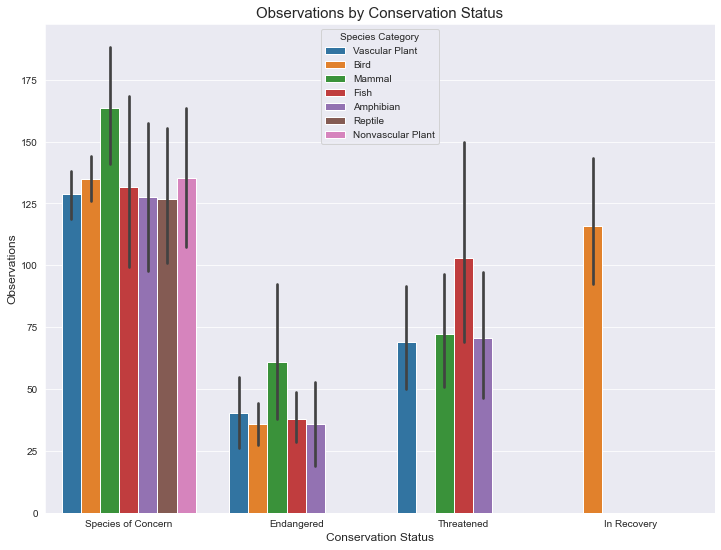

In [403]:
plt.figure(figsize = (12,9))
sns.barplot(data = concerned, x = 'conservation_status', y = 'observations', hue = 'category')
plt.title('Observations by Conservation Status', fontsize = 15)
plt.xlabel('Conservation Status', fontsize = 12)
plt.ylabel('Observations', fontsize = 12)
plt.legend(title = 'Species Category')
plt.show()

Now, how many of each species category are in which conservation status?

In [406]:
conservationCategory = data[data.conservation_status != "Least Concern"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,24.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,16.0,272.0,16.0,88.0,20.0,20.0,172.0
Threatened,8.0,NaN,16.0,8.0,NaN,NaN,8.0


I don't like the way the NaN values look on that chart. Let's replace them with zeroes.

In [407]:
type(conservationCategory)
conservationCategory.fillna(0, inplace=True) 
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,24.0,0.0,0.0,4.0
In Recovery,0.0,12.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,16.0,272.0,16.0,88.0,20.0,20.0,172.0
Threatened,8.0,0.0,16.0,8.0,0.0,0.0,8.0


Now, let's see which species are most populous.

In [411]:
most_common = data.groupby(['scientific_name']).sum('observations').reset_index()
most_common.sort_values(by=['observations'], inplace=True)
top5 = most_common.tail(5)
print(top5)

            scientific_name  observations
4179          Puma concolor          1711
2555   Hypochaeris radicata          1720
1103      Castor canadensis          1725
2452         Holcus lanatus          1780
4993  Streptopelia decaocto          1785


The top five species are Eurasian collared dove, common velvet grass, North American beaver, common cat's-ear, and cougar.

In [460]:
most_common = data.loc[(data.scientific_name == 'Puma concolor') | (data.scientific_name == 'Hypochaeris radicata') | (data.scientific_name == 'Castor canadensis') | (data.scientific_name == 'Holcus lanatus') | (data.scientific_name == 'Streptopelia decaocto')]
most_common

,scientific_name,park_name,observations,category,common_names,conservation_status
7422,Streptopelia decaocto,Bryce National Park,301,Bird,Eurasian Collared Dove,Least Concern
7671,Holcus lanatus,Yosemite National Park,463,Vascular Plant,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Least Concern
7881,Holcus lanatus,Bryce National Park,296,Vascular Plant,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Least Concern
8941,Hypochaeris radicata,Yosemite National Park,505,Vascular Plant,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern
9842,Streptopelia decaocto,Yellowstone National Park,771,Bird,Eurasian Collared Dove,Least Concern
12101,Castor canadensis,Yellowstone National Park,703,Mammal,Beaver,Least Concern
13712,Streptopelia decaocto,Great Smoky Mountains National Park,256,Bird,Eurasian Collared Dove,Least Concern
14664,Puma concolor,Yellowstone National Park,753,Mammal,Mountain Lion,Least Concern
15517,Puma concolor,Great Smoky Mountains National Park,239,Mammal,Mountain Lion,Least Concern
15619,Castor canadensis,Bryce National Park,278,Mammal,Beaver,Least Concern


In [461]:
most_common = most_common.groupby(['scientific_name', 'park_name']).sum('observations').reset_index()
most_common

,scientific_name,park_name,observations
0,Castor canadensis,Bryce National Park,278
1,Castor canadensis,Great Smoky Mountains National Park,243
2,Castor canadensis,Yellowstone National Park,703
3,Castor canadensis,Yosemite National Park,501
4,Holcus lanatus,Bryce National Park,296
5,Holcus lanatus,Great Smoky Mountains National Park,216
6,Holcus lanatus,Yellowstone National Park,805
7,Holcus lanatus,Yosemite National Park,463
8,Hypochaeris radicata,Bryce National Park,294
9,Hypochaeris radicata,Great Smoky Mountains National Park,195


In [462]:
doves = most_common[most_common.scientific_name == 'Streptopelia decaocto']
doves

,scientific_name,park_name,observations
16,Streptopelia decaocto,Bryce National Park,301
17,Streptopelia decaocto,Great Smoky Mountains National Park,256
18,Streptopelia decaocto,Yellowstone National Park,771
19,Streptopelia decaocto,Yosemite National Park,457


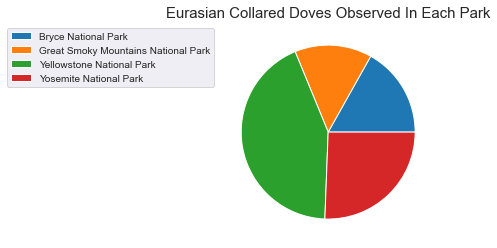

In [464]:
plt.pie(doves.observations)
plt.title('Eurasian Collared Doves Observed In Each Park', fontsize = 15)
plt.legend(doves.park_name, bbox_to_anchor=(0, 1))
plt.show()

## Conclusions
* Endangered species were least likely to be observed, which makes a great deal of sense.
* Birds, vascular plants, and mammals were most likely to be Endangered or Threatened.
* Yellowstone National Park showed the greatest biodiversity and Great Smokey Mountain Natonal Park the least biodiversity. That should be considered when allocating funding.
* Special attention should be given to methodology when gathering information i the future, as the lack of detail prevented the researchers drawing firmer conclusions.